In [1]:
import pybedtools as pbt
import pysam
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
import altair as alt
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [3]:
import os.path as op

In [4]:
import seaborn as sns

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import splanl.junction_scorer as jn
import splanl.merge_bcs as mbcs
import splanl.coords as cds
import splanl.plots as sp
import splanl.score_motifs as sm
import splanl.inspect_variants as iv
import splanl.post_processing as pp

In [7]:
isos_in = '/nfs/kitzman2/smithcat/proj/campersplice/pouf1_data/'

In [8]:
isos_df = pd.read_table(isos_in+'pou1f1_isoforms_2020-0827.txt')

In [9]:
isos_df = isos_df.set_index('isonum')

In [10]:
bdout = '/nfs/kitzman2/smithcat/proj/campersplice/pouf1_data/hb_samples/'

In [11]:
bdrna='/nfs/kitzman2/smithcat/proj/campersplice/gmap_align/2020-0827/edited/'

In [12]:
lfn_rna = !ls {bdrna}*hbpou1mix*_edited.bam

In [13]:
lfn_rna

['/nfs/kitzman2/smithcat/proj/campersplice/gmap_align/2020-0827/edited/hbpou1mix_brep1_mm1_A4_bc_filt_edited.bam',
 '/nfs/kitzman2/smithcat/proj/campersplice/gmap_align/2020-0827/edited/hbpou1mix_brep1_mm2_A10_bc_filt_edited.bam',
 '/nfs/kitzman2/smithcat/proj/campersplice/gmap_align/2020-0827/edited/hbpou1mix_brep2_mm1_B4_bc_filt_edited.bam',
 '/nfs/kitzman2/smithcat/proj/campersplice/gmap_align/2020-0827/edited/hbpou1mix_brep2_mm2_B10_bc_filt_edited.bam',
 '/nfs/kitzman2/smithcat/proj/campersplice/gmap_align/2020-0827/edited/hbpou1mix_brep3_mm1_C4_bc_filt_edited.bam',
 '/nfs/kitzman2/smithcat/proj/campersplice/gmap_align/2020-0827/edited/hbpou1mix_brep3_mm2_C10_bc_filt_edited.bam',
 '/nfs/kitzman2/smithcat/proj/campersplice/gmap_align/2020-0827/edited/hbpou1mix_brep4_mm1_D4_bc_filt_edited.bam',
 '/nfs/kitzman2/smithcat/proj/campersplice/gmap_align/2020-0827/edited/hbpou1mix_brep4_mm2_D10_bc_filt_edited.bam',
 '/nfs/kitzman2/smithcat/proj/campersplice/gmap_align/2020-0827/edited/hbpou

In [14]:
msamp_fn = { op.split(fn)[-1].replace('_bc_filt_edited.bam','').replace('hbpou1mix_','') : fn
             for fn in lfn_rna }

In [15]:
msamp_fn

{'brep1_mm1_A4': '/nfs/kitzman2/smithcat/proj/campersplice/gmap_align/2020-0827/edited/hbpou1mix_brep1_mm1_A4_bc_filt_edited.bam',
 'brep1_mm2_A10': '/nfs/kitzman2/smithcat/proj/campersplice/gmap_align/2020-0827/edited/hbpou1mix_brep1_mm2_A10_bc_filt_edited.bam',
 'brep2_mm1_B4': '/nfs/kitzman2/smithcat/proj/campersplice/gmap_align/2020-0827/edited/hbpou1mix_brep2_mm1_B4_bc_filt_edited.bam',
 'brep2_mm2_B10': '/nfs/kitzman2/smithcat/proj/campersplice/gmap_align/2020-0827/edited/hbpou1mix_brep2_mm2_B10_bc_filt_edited.bam',
 'brep3_mm1_C4': '/nfs/kitzman2/smithcat/proj/campersplice/gmap_align/2020-0827/edited/hbpou1mix_brep3_mm1_C4_bc_filt_edited.bam',
 'brep3_mm2_C10': '/nfs/kitzman2/smithcat/proj/campersplice/gmap_align/2020-0827/edited/hbpou1mix_brep3_mm2_C10_bc_filt_edited.bam',
 'brep4_mm1_D4': '/nfs/kitzman2/smithcat/proj/campersplice/gmap_align/2020-0827/edited/hbpou1mix_brep4_mm1_D4_bc_filt_edited.bam',
 'brep4_mm2_D10': '/nfs/kitzman2/smithcat/proj/campersplice/gmap_align/2020-0

In [16]:
isogrpdict = { samp: jn.create_iso_dict_no_cnst(isos_df.query('hb_'+samp+'_filter!=0'))
              for samp in msamp_fn }

In [17]:
isogrpdict['brep1_mm1_A4']

{'iso0056': ((1150, 1254),),
 'iso0174': ((1248, 1272),),
 'iso0209': ((1201, 1209), (1211, 1272)),
 'iso0277': ((1143, 1247),),
 'iso0283': ((1191, 1272),),
 'iso0401': ((1149, 1252),),
 'iso0505': ((1184, 1272),),
 'iso0540': ((1180, 1272),),
 'iso0555': ((1201, 1272), (1440, 1470)),
 'iso0628': ((1143, 1246),),
 'iso0701': ((1164, 1267),),
 'iso0737': ((1169, 1271),),
 'iso0931': ((1201, 1268),),
 'iso0957': ((1201, 1240), (1242, 1272)),
 'iso0963': ((1195, 1272),),
 'iso1280': ((1160, 1259),),
 'iso1396': ((1110, 1212),),
 'iso1585': ((1180, 1274),),
 'iso1679': ((1123, 1223),),
 'iso1699': ((1145, 1247),),
 'iso1711': ((1158, 1259),),
 'iso1737': ((1207, 1272), (1440, 1476)),
 'iso1754': ((1159, 1259),),
 'iso1839': ((1123, 1226),),
 'iso2080': ((1196, 1272),),
 'iso2094': ((1201, 1272),),
 'iso2303': ((1171, 1273),),
 'iso2394': ((1193, 1272),),
 'iso2541': ((1201, 1272), (1440, 1472)),
 'iso2546': ((1158, 1261),),
 'iso2643': ((1149, 1251),),
 'iso2656': ((1164, 1266),),
 'iso26

In [18]:
satbl = pd.read_csv( '/nfs/kitzman2/jacob/proj/campersplice/pou1f1_subassembly_deep_20190917/pou1f1_subasm_joined_191011.tsv' ,
                    sep='\t' )

satbl = satbl.set_index('readgroupid')

In [19]:
satbl = satbl.drop( columns=[ col for col in satbl.columns if 'nbp' in col ] )

In [20]:
msamp_rnabam = { samp: pysam.AlignmentFile(msamp_fn[samp],'rb') for samp in msamp_fn }

In [21]:
%%time
#3.75 min
msamp_bcrnatbl = {samp: jn.compute_isoform_counts(msamp_rnabam[samp],
                                           isogrpdict[samp],
                                           [(649,696),(3500,3655)])
                  for samp in isogrpdict}

processed 1000 bcs, 7320 reads
processed 2000 bcs, 14744 reads
processed 3000 bcs, 22646 reads
processed 4000 bcs, 30479 reads
processed 5000 bcs, 38036 reads
processed 6000 bcs, 45839 reads
processed 7000 bcs, 53988 reads
processed 8000 bcs, 62328 reads
processed 9000 bcs, 70101 reads
processed 10000 bcs, 78912 reads
processed 11000 bcs, 87675 reads
processed 12000 bcs, 96500 reads
processed 13000 bcs, 105888 reads
processed 14000 bcs, 115016 reads
processed 15000 bcs, 123217 reads
processed 16000 bcs, 131097 reads
processed 17000 bcs, 138506 reads
processed 18000 bcs, 146621 reads
processed 19000 bcs, 154720 reads
processed 20000 bcs, 161937 reads
processed 21000 bcs, 168851 reads
processed 22000 bcs, 176023 reads
processed 23000 bcs, 183782 reads
processed 24000 bcs, 191149 reads
processed 25000 bcs, 199125 reads
processed 26000 bcs, 205864 reads
processed 27000 bcs, 211626 reads
processed 28000 bcs, 219526 reads
processed 29000 bcs, 227785 reads
processed 30000 bcs, 234290 reads
pr

processed 78000 bcs, 670679 reads
processed 79000 bcs, 680290 reads
processed 80000 bcs, 690381 reads
processed 81000 bcs, 700334 reads
processed 82000 bcs, 710454 reads
processed 83000 bcs, 720942 reads
processed 84000 bcs, 731310 reads
processed 85000 bcs, 741111 reads
processed 86000 bcs, 750426 reads
processed 87000 bcs, 759563 reads
processed 88000 bcs, 768337 reads
processed 89000 bcs, 777832 reads
processed 90000 bcs, 787384 reads
processed 91000 bcs, 796538 reads
processed 92000 bcs, 804664 reads
processed 93000 bcs, 813491 reads
processed 94000 bcs, 821920 reads
processed 95000 bcs, 831244 reads
processed 96000 bcs, 840623 reads
processed 97000 bcs, 849544 reads
processed 98000 bcs, 858749 reads
processed 99000 bcs, 865762 reads
processed 100000 bcs, 872580 reads
processed 101000 bcs, 880492 reads
processed 102000 bcs, 889589 reads
processed 103000 bcs, 898288 reads
processed 104000 bcs, 906419 reads
processed 105000 bcs, 913837 reads
processed 106000 bcs, 921915 reads
process

processed 152000 bcs, 1140037 reads
processed 153000 bcs, 1147846 reads
processed 154000 bcs, 1154269 reads
processed 155000 bcs, 1160332 reads
processed 156000 bcs, 1168204 reads
processed 157000 bcs, 1175716 reads
processed 158000 bcs, 1183236 reads
processed 159000 bcs, 1190421 reads
processed 160000 bcs, 1198204 reads
processed 161000 bcs, 1206279 reads
processed 162000 bcs, 1213139 reads
processed 163000 bcs, 1220670 reads
processed 1000 bcs, 7397 reads
processed 2000 bcs, 14953 reads
processed 3000 bcs, 22886 reads
processed 4000 bcs, 30800 reads
processed 5000 bcs, 37972 reads
processed 6000 bcs, 45832 reads
processed 7000 bcs, 54094 reads
processed 8000 bcs, 62506 reads
processed 9000 bcs, 70373 reads
processed 10000 bcs, 79284 reads
processed 11000 bcs, 88836 reads
processed 12000 bcs, 98292 reads
processed 13000 bcs, 107769 reads
processed 14000 bcs, 116902 reads
processed 15000 bcs, 125002 reads
processed 16000 bcs, 132857 reads
processed 17000 bcs, 140597 reads
processed 18

processed 67000 bcs, 429681 reads
processed 68000 bcs, 436453 reads
processed 69000 bcs, 442923 reads
processed 70000 bcs, 449391 reads
processed 71000 bcs, 456466 reads
processed 72000 bcs, 463449 reads
processed 73000 bcs, 469996 reads
processed 74000 bcs, 476684 reads
processed 75000 bcs, 483186 reads
processed 76000 bcs, 490320 reads
processed 77000 bcs, 497301 reads
processed 78000 bcs, 504339 reads
processed 79000 bcs, 511664 reads
processed 80000 bcs, 518836 reads
processed 81000 bcs, 526153 reads
processed 82000 bcs, 533439 reads
processed 83000 bcs, 540165 reads
processed 84000 bcs, 547079 reads
processed 85000 bcs, 553470 reads
processed 86000 bcs, 560083 reads
processed 87000 bcs, 567035 reads
processed 88000 bcs, 574017 reads
processed 89000 bcs, 580224 reads
processed 90000 bcs, 586460 reads
processed 91000 bcs, 592725 reads
processed 92000 bcs, 598955 reads
processed 93000 bcs, 605626 reads
processed 94000 bcs, 612259 reads
processed 95000 bcs, 619283 reads
processed 9600

processed 147000 bcs, 1075447 reads
processed 148000 bcs, 1082746 reads
processed 149000 bcs, 1090274 reads
processed 150000 bcs, 1097555 reads
processed 151000 bcs, 1102742 reads
processed 152000 bcs, 1110425 reads
processed 153000 bcs, 1117876 reads
processed 154000 bcs, 1125082 reads
processed 155000 bcs, 1132569 reads
processed 156000 bcs, 1140033 reads
processed 157000 bcs, 1147785 reads
processed 158000 bcs, 1155507 reads
processed 159000 bcs, 1162955 reads
processed 1000 bcs, 7773 reads
processed 2000 bcs, 15490 reads
processed 3000 bcs, 23827 reads
processed 4000 bcs, 32095 reads
processed 5000 bcs, 39798 reads
processed 6000 bcs, 47726 reads
processed 7000 bcs, 56393 reads
processed 8000 bcs, 65456 reads
processed 9000 bcs, 73716 reads
processed 10000 bcs, 82693 reads
processed 11000 bcs, 92172 reads
processed 12000 bcs, 101278 reads
processed 13000 bcs, 111377 reads
processed 14000 bcs, 120945 reads
processed 15000 bcs, 129655 reads
processed 16000 bcs, 138015 reads
processed

processed 62000 bcs, 536491 reads
processed 63000 bcs, 544755 reads
processed 64000 bcs, 553413 reads
processed 65000 bcs, 561386 reads
processed 66000 bcs, 570875 reads
processed 67000 bcs, 580698 reads
processed 68000 bcs, 590175 reads
processed 69000 bcs, 599487 reads
processed 70000 bcs, 608818 reads
processed 71000 bcs, 618477 reads
processed 72000 bcs, 627865 reads
processed 73000 bcs, 637288 reads
processed 74000 bcs, 647596 reads
processed 75000 bcs, 656545 reads
processed 76000 bcs, 665534 reads
processed 77000 bcs, 675114 reads
processed 78000 bcs, 684829 reads
processed 79000 bcs, 694620 reads
processed 80000 bcs, 704795 reads
processed 81000 bcs, 714872 reads
processed 82000 bcs, 725741 reads
processed 83000 bcs, 735852 reads
processed 84000 bcs, 746885 reads
processed 85000 bcs, 756597 reads
processed 86000 bcs, 766663 reads
processed 87000 bcs, 776485 reads
processed 88000 bcs, 785139 reads
processed 89000 bcs, 794994 reads
processed 90000 bcs, 805099 reads
processed 9100

processed 135000 bcs, 1182616 reads
processed 136000 bcs, 1191957 reads
processed 137000 bcs, 1201180 reads
processed 138000 bcs, 1209960 reads
processed 139000 bcs, 1218253 reads
processed 140000 bcs, 1227098 reads
processed 141000 bcs, 1236020 reads
processed 142000 bcs, 1244560 reads
processed 143000 bcs, 1253488 reads
processed 144000 bcs, 1262228 reads
processed 145000 bcs, 1270535 reads
processed 146000 bcs, 1278562 reads
processed 147000 bcs, 1287337 reads
processed 148000 bcs, 1295896 reads
processed 149000 bcs, 1305241 reads
processed 150000 bcs, 1313518 reads
processed 151000 bcs, 1321190 reads
processed 152000 bcs, 1327257 reads
processed 153000 bcs, 1334609 reads
processed 154000 bcs, 1343537 reads
processed 155000 bcs, 1352168 reads
processed 156000 bcs, 1361602 reads
processed 157000 bcs, 1369758 reads
processed 158000 bcs, 1376183 reads
processed 159000 bcs, 1385636 reads
processed 160000 bcs, 1394408 reads
processed 161000 bcs, 1403443 reads
processed 162000 bcs, 141204

In [22]:
msamp_bcrnatbl_flen = {samp: jn.filter_on_barc_len( msamp_bcrnatbl[samp], 30 )
                       for samp in msamp_bcrnatbl}

In [23]:
msamp_bcrnatbl_flen['brep1_mm1_A4'].head()

,num_reads,unmapped_reads,bad_starts,bad_ends,soft_clipped,other_isoform,iso0056,iso0174,iso0209,iso0277,...,iso6550,iso6590,iso6629,iso6654,iso6687,iso6743,iso6816,iso6828,iso6831,usable_reads
barcode,,,,,,,,,,,,,,,,,,,,,
AAAAAAAACTGCGAGACGTCTGG,6,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
AAAAAACCTGCGCGACCCCCTGG,7,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
AAAAAACTGTGTGGCCATACTGG,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
AAAAAACTTGCCCTCTATTGTGG,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
AAAAAAGACGGGGGGGCTGCTGG,12,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10


brep1_mm1_A4


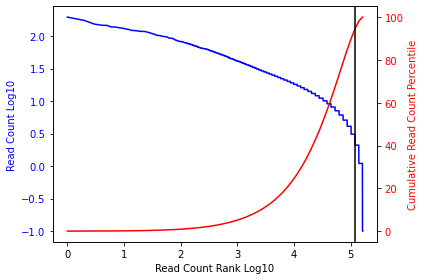

The read count cut off at the 95 th percentile is 2
brep1_mm2_A10


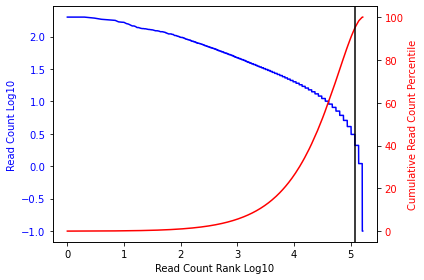

The read count cut off at the 95 th percentile is 2
brep2_mm1_B4


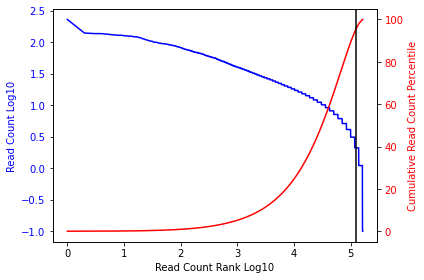

The read count cut off at the 95 th percentile is 2
brep2_mm2_B10


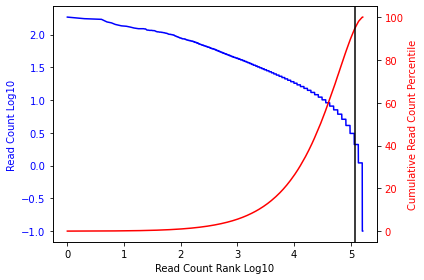

The read count cut off at the 95 th percentile is 2
brep3_mm1_C4


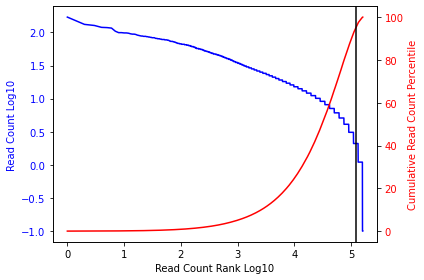

The read count cut off at the 95 th percentile is 2
brep3_mm2_C10


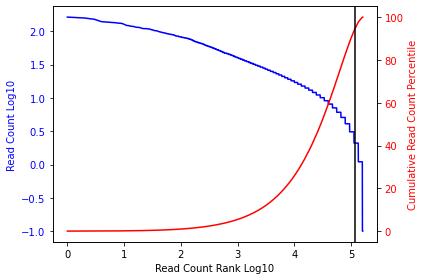

The read count cut off at the 95 th percentile is 2
brep4_mm1_D4


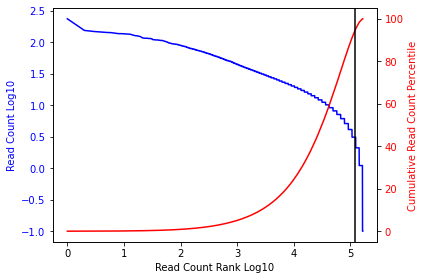

The read count cut off at the 95 th percentile is 3
brep4_mm2_D10


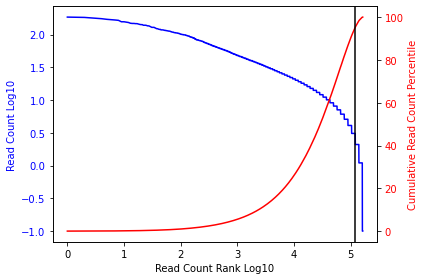

The read count cut off at the 95 th percentile is 3
brep5_mm1_E4


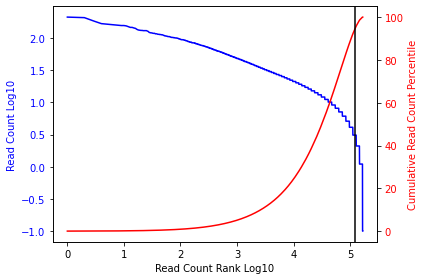

The read count cut off at the 95 th percentile is 3
brep5_mm2_E10


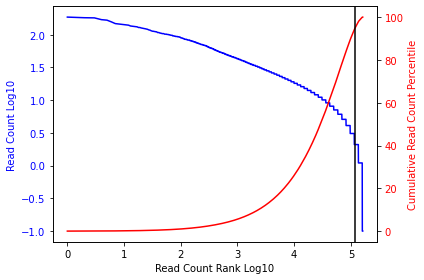

The read count cut off at the 95 th percentile is 2


In [24]:
for samp in msamp_bcrnatbl_flen:
    print(samp)
    sp.waterfall_plot(msamp_bcrnatbl_flen[samp],
              'usable_reads',
               95)

In [25]:
cut_list = [2,2,2,2,2,2,3,3,3,2]
cut_dict = { samp: cut_list[i] for i,samp in enumerate( msamp_bcrnatbl_flen ) }

In [26]:
msamp_varbcrnatbl_flen_allisos = {samp: mbcs.merge_subasm_and_rna_tbls(satbl,
                                                                    msamp_bcrnatbl_flen[samp])
                                 for samp in msamp_bcrnatbl_flen}

In [27]:
msamp_varbcrnatbl_flen_allisos['brep1_mm1_A4'].head()

,passes,refname,status,n_variants_passing,variant_list,max_altAF,second_altAF,max_altRD,second_altRD,reads_in,...,iso6550,iso6590,iso6629,iso6654,iso6687,iso6743,iso6816,iso6828,iso6831,usable_reads
GTTGCCTATAGTGTCTTTTGTGG,True,pspl3_pou1f1_bc,pass,1,pspl3_pou1f1_bc:1376:C:T,0.589147,-1.0,76,-1,1000,...,0,0,0,0,0,0,0,0,0,9
GTTGCCTGCAGGATCAATTTTGG,True,pspl3_pou1f1_bc,pass,1,pspl3_pou1f1_bc:1382:T:A,0.544715,-1.0,67,-1,1000,...,0,0,0,0,0,0,0,0,0,4
GTTGCCTTCGTTACGGTTCGTGG,True,pspl3_pou1f1_bc,pass,1,pspl3_pou1f1_bc:1387:A:T,0.489933,-1.0,73,-1,1000,...,0,0,0,0,0,0,0,0,0,17
GTTGCGAATGGCGATGATATTGG,True,pspl3_pou1f1_bc,pass,1,pspl3_pou1f1_bc:1300:T:C,0.456480,-1.0,236,-1,1000,...,0,0,0,0,0,0,0,0,0,5
GTTGCGACGGGAGCTATCGCTGG,True,pspl3_pou1f1_bc,pass,1,pspl3_pou1f1_bc:1364:G:C,0.579365,1.0,73,1,1000,...,0,0,0,0,0,0,0,0,0,2


In [28]:
%%time
for samp in msamp_varbcrnatbl_flen_allisos:
    msamp_varbcrnatbl_flen_allisos[samp].to_csv(
                                bdout+samp+'_hb_pou1f1_by_bc_effects_allvars_allisos-20200827.txt',
                                sep='\t'
                                )

CPU times: user 29.9 s, sys: 403 ms, total: 30.3 s
Wall time: 38.7 s


In [29]:
isonamedict = {'ALPHA':[(1201,1272)],
              'BETA':[(1123, 1225)],
              'SKIP':[]}

In [30]:
namedisogrps = {samp: jn.create_named_isogrps(isogrpdict[samp],
                                            isonamedict,
                                            [(1439,1538)],
                                            47,
                                            150,
                                            3)
                for samp in isogrpdict}

In [32]:
msamp_bcrnatbl_flen_rename = {samp: jn.combine_isogrps( namedisogrps[samp],
                                                        msamp_bcrnatbl_flen[samp] ) 
                              for samp in namedisogrps}

In [33]:
msamp_varbcrnatbl_flen_rename = {samp: mbcs.merge_subasm_and_rna_tbls(satbl,
                                                                    msamp_bcrnatbl_flen_rename[samp])
                                 for samp in msamp_bcrnatbl_flen_rename}

In [34]:
%%time
bybcvartbl_long = mbcs.combine_rep_perbctbls_long( [ msamp_varbcrnatbl_flen_rename[samp] for samp in msamp_varbcrnatbl_flen_rename ],
                                                              [ samp for samp in msamp_varbcrnatbl_flen_rename ] )

CPU times: user 799 ms, sys: 455 ms, total: 1.25 s
Wall time: 1.25 s


In [35]:
bybcvartbl_long.to_csv(
                                bdout+'hb_pou1f1_by_bc_effects_allvars-20200827.txt',
                                sep='\t'
                                )

In [36]:
%%time
msamp_byvartbl_allisos = {samp: mbcs.summarize_byvar_singlevaronly(satbl,
                                                            msamp_bcrnatbl_flen[samp],
                                                            [(1123,1272)],
                                                            cut_dict[samp] )
                          for samp in msamp_bcrnatbl}

CPU times: user 9min 2s, sys: 2.93 s, total: 9min 5s
Wall time: 9min 4s


In [37]:
msamp_byvartbl_allisos_snvs = { samp: mbcs.filter_byvartbl_snvonly( msamp_byvartbl_allisos[samp] )
                              for samp in msamp_byvartbl_allisos }

In [38]:
msamp_byvartbl_allisos_snvs['brep1_mm1_A4'].head()

,varlist,chrom,pos,ref,alt,n_bc,n_bc_passfilt,sum_reads,sum_reads_passfilt,sum_usable_reads,...,median_iso6831,n_bc_sa,per_bc_passfilt,per_reads_passfilt,per_reads_usable,per_unmapped,per_badend,per_badstart,per_softclipped,per_otheriso
0,pspl3_pou1f1_bc:1044:G:A,pspl3_pou1f1_bc,1044,G,A,183,150,1883,1828,1639,...,0.0,207,81.967213,97.079129,89.660832,0.0,9.628009,0.0,0.000000,0.711160
1,pspl3_pou1f1_bc:1044:G:C,pspl3_pou1f1_bc,1044,G,C,193,158,1988,1916,1740,...,0.0,212,81.865285,96.378270,90.814196,0.0,8.611691,0.0,0.000000,0.574113
2,pspl3_pou1f1_bc:1044:G:T,pspl3_pou1f1_bc,1044,G,T,125,110,1519,1495,1333,...,0.0,137,88.000000,98.420013,89.163880,0.0,10.167224,0.0,0.066890,0.602007
3,pspl3_pou1f1_bc:1045:T:A,pspl3_pou1f1_bc,1045,T,A,102,89,1281,1257,1125,...,0.0,105,87.254902,98.126464,89.498807,0.0,10.023866,0.0,0.079554,0.397772
4,pspl3_pou1f1_bc:1045:T:C,pspl3_pou1f1_bc,1045,T,C,148,125,1550,1508,1386,...,0.0,160,84.459459,97.290323,91.909814,0.0,7.758621,0.0,0.000000,0.331565


In [39]:
for samp in msamp_byvartbl_allisos_snvs:

    msamp_byvartbl_allisos_snvs[samp]['hgvs_pos'] = cds.pos_to_hgvspos( msamp_byvartbl_allisos_snvs[samp]['pos'],
                                                                           (1038,1450),
                                                                           [(1123,1272),],
                                                                           [(143,292),]
                                                                         )

In [40]:
byvartbl_allisos_long = mbcs.combine_allisos_pervartbls_long( [ msamp_byvartbl_allisos_snvs[samp] for samp in msamp_byvartbl_allisos_snvs ],
                                                              [ samp for samp in msamp_byvartbl_allisos_snvs ] )

In [41]:
byvartbl_allisos_long.to_csv(
                                bdout+'hb_pou1f1_by_var_effects_allisos_snvs-20200827.txt',
                                sep='\t',
                                index=False
                                )

In [42]:
%%time
msamp_byvartbl = { samp: mbcs.summarize_byvar_singlevaronly(satbl,
                                                            msamp_bcrnatbl_flen_rename[samp],
                                                            [(1123,1272)],
                                                            cut_dict[samp],
                                                            ['ALPHA', 'BETA', 'SKIP', 'OTHER'] )
                          for samp in msamp_bcrnatbl_flen_rename }

CPU times: user 38.3 s, sys: 136 ms, total: 38.5 s
Wall time: 38.4 s


In [43]:
msamp_byvartbl_snvs = {samp: mbcs.filter_byvartbl_snvonly( msamp_byvartbl[samp] )
                              for samp in msamp_byvartbl}

In [44]:
for samp in msamp_byvartbl_snvs:

    msamp_byvartbl_snvs[samp]['hgvs_pos'] = cds.pos_to_hgvspos( msamp_byvartbl_snvs[samp]['pos'],
                                                                   (1038,1450),
                                                                   [(1123,1272),],
                                                                   [(143,292),]
                                                                 )

In [45]:
byvartbl_long = mbcs.combine_rep_pervartbls_long( [msamp_byvartbl_snvs[samp] for samp in msamp_byvartbl_snvs],
                                                [samp for samp in msamp_byvartbl_snvs])

In [46]:
byvartbl_long['wmean_ALPHA_inv'] = 1 - byvartbl_long.wmean_ALPHA

In [47]:
byvartbl_long = pp.stdize_cols_by_sample( byvartbl_long,
                                            [ 'wmean_'+col for col in ['ALPHA', 'BETA', 'SKIP', 'OTHER', 'ALPHA_inv'] ] )

In [48]:
fasta_file = '/nfs/kitzman2/jacob/proj/campersplice/refs/pspl3_pou1f1_bc.fa'

In [49]:
refseq = pp.get_refseq( fasta_file )[0]

In [50]:
byvartbl_long = pp.acceptors_donors( refseq,
                                    byvartbl_long,
                                    'zwmean_OTHER',
                                    1.5 )

In [51]:
byvartbl_long = pp.sdvs( byvartbl_long,
                        'zwmean_ALPHA_inv',
                                    1.5 )

In [52]:
byvartbl_long = pp.extract_var_type( byvartbl_long,
                                      refseq, 
                                      ( 1123, 1272 ),
                                     2 )

In [ ]:
###  Original patient mutations
#  S50A = c.148 T>G = 1128
#  S50S = c.150 T>G = 1130
#  I51S = c.152 T>G = 1132
#  L52W = c.155 T>G = 1135
#  S53A = c.157 T>G = 1137

In [53]:
byvartbl_long = pp.sdv_by_var_type( byvartbl_long )

In [54]:
byvartbl_long.head()

,pos,alt,chrom,ref,varlist,sample,n_bc,n_bc_passfilt,sum_reads,sum_reads_passfilt,...,psbl_snv_acc,psbl_snv_don,snv_acc,snv_don,sdv,ref_aa,alt_aa,var_type,sdv_exon,sdv_intron
0,1044,A,pspl3_pou1f1_bc,G,pspl3_pou1f1_bc:1044:G:A,brep1_mm1_A4,183.0,150.0,1883.0,1828.0,...,False,False,False,False,False,NaN,NaN,Intronic,False,False
1,1044,A,pspl3_pou1f1_bc,G,pspl3_pou1f1_bc:1044:G:A,brep4_mm2_D10,186.0,133.0,1992.0,1868.0,...,False,False,False,False,False,NaN,NaN,Intronic,False,False
2,1044,A,pspl3_pou1f1_bc,G,pspl3_pou1f1_bc:1044:G:A,brep2_mm1_B4,183.0,144.0,1681.0,1611.0,...,False,False,False,False,False,NaN,NaN,Intronic,False,False
3,1044,A,pspl3_pou1f1_bc,G,pspl3_pou1f1_bc:1044:G:A,brep3_mm2_C10,181.0,135.0,1543.0,1462.0,...,False,False,False,False,False,NaN,NaN,Intronic,False,False
4,1044,A,pspl3_pou1f1_bc,G,pspl3_pou1f1_bc:1044:G:A,brep5_mm2_E10,178.0,140.0,1629.0,1557.0,...,False,False,False,False,False,NaN,NaN,Intronic,False,False


In [55]:
byvartbl_long.to_csv(
                    bdout+'hb_pou1f1_by_var_effects_snvs-20200827.txt',
                    sep='\t',
                    index=False
                                )